In [10]:
import pandas as pd 
accident = pd.read_csv(
    r"NYC Accidents 2020.csv"
)
import janitor
accident = accident.clean_names()
accident
accident["date_time"] = accident["crash_date"] + " " + accident["crash_time"]
accident

C:\Users\HP\AppData\Local\Temp\ipykernel_22372\2777662490.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident["date_time"] = accident["crash_date"] + " " + accident["crash_time"]


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,date_time
0,2020-08-29,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2020-08-29 15:40:00
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 21:00:00
2,2020-08-29,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2020-08-29 18:20:00
3,2020-08-29,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN,2020-08-29 00:00:00
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN,2020-08-29 17:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,2020-01-01,15:13:00,BRONX,10459.0,40.826810,-73.896510,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,...,NaN,NaN,NaN,4268088,Sedan,NaN,NaN,NaN,NaN,2020-01-01 15:13:00
74877,2020-01-01,08:00:00,BROOKLYN,11235.0,40.582935,-73.959210,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,...,Unspecified,NaN,NaN,4267756,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,2020-01-01 08:00:00
74878,2020-01-01,11:36:00,BRONX,10461.0,40.848553,-73.830055,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,...,NaN,NaN,NaN,4269230,Sedan,Pick-up Truck,NaN,NaN,NaN,2020-01-01 11:36:00
74879,2020-01-01,01:45:00,MANHATTAN,10017.0,40.753624,-73.969440,POINT (-73.96944 40.753624),EAST 48 STREET,2 AVENUE,NaN,...,NaN,NaN,NaN,4267482,Sedan,Taxi,NaN,NaN,NaN,2020-01-01 01:45:00


C:\Users\HP\AppData\Local\Temp\ipykernel_22372\2277434041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident["date_time"] = pd.to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_22372\2277434041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident["mont_of_acc"] = accident["date_time"].dt.month_name()
C:\Users\HP\AppData\Local\Temp\ipykernel_22372\2277434041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<Axes: xlabel='mont_of_acc'>

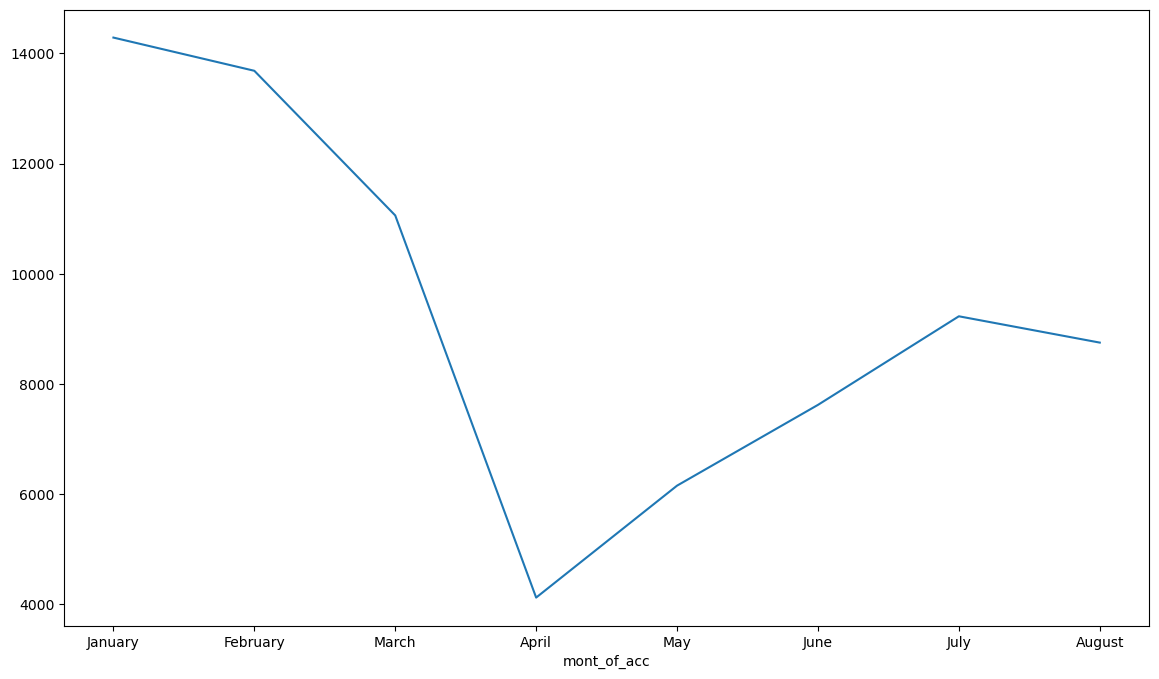

In [4]:
accident["date_time"] = pd.to_datetime(
    accident["date_time"],format="%Y-%m-%d %H:%M:%S"
)
accident["mont_of_acc"] = accident["date_time"].dt.month_name()
import calendar
months = list(calendar.month_name)[1:-4]
accident["mont_of_acc"] = pd.Categorical(
    accident["mont_of_acc"],months,ordered=True
)
accident["mont_of_acc"].value_counts(sort=False).plot(figsize=(14,8))

In [5]:
accident["mont_of_acc"].value_counts(sort=False,normalize=True)

mont_of_acc
January     0.190796
February    0.182743
March       0.147661
April       0.054967
May         0.082117
June        0.101708
July        0.123195
August      0.116812
Name: proportion, dtype: float64

In [6]:

accident["mont_of_acc"].value_counts(sort=False,normalize=True).map(
    lambda x: f"{x:.2%}"
)

mont_of_acc
January     19.08%
February    18.27%
March       14.77%
April        5.50%
May          8.21%
June        10.17%
July        12.32%
August      11.68%
Name: proportion, dtype: object

In [8]:
accident["season"] = accident["mont_of_acc"].map(
    lambda x:
    "Winter" if x in ["December","January","February"]
    else "spring" if x in ["March","April","May"]
    else "Summer"
)
accident["season"].value_counts(normalize=True).map(
    lambda x: f"{x:.2%}")

season
Winter    37.35%
Summer    34.17%
spring    28.47%
Name: proportion, dtype: object

In [9]:

accident["day"] = accident["date_time"].dt.day_name()
accident["day"].value_counts()
accident["hour"] = accident["date_time"].dt.hour
accident["hour"].value_counts()
accident.groupby(["day","hour"])["date_time"].count().sort_values(ascending=False)

day        hour
Friday     16      870
           14      815
Thursday   16      814
Friday     17      804
           18      800
                  ... 
Wednesday  4       103
Tuesday    3        96
           2        88
           4        78
Thursday   3        78
Name: date_time, Length: 168, dtype: int64